<a href="https://colab.research.google.com/github/rakeshsurampalli/smart_investment/blob/master/exponencial_moving_average_and_relative_strength_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas

In [8]:
!pip install quandl

In [0]:
import quandl # https://github.com/quandl/quandl-python#configuration
api_key = 'qVwroBWLG9jq9C4THLB'

In [6]:
import pandas_datareader.data as web

symbol = 'FB' 
FB = web.DataReader(symbol, 'yahoo', start='2015-07-04', end='2017-07-04')
FB.tail()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-27,153.309998,150.389999,152.839996,150.580002,19360800,150.580002
2017-06-28,153.470001,149.860001,150.919998,153.240005,16719100,153.240005
2017-06-29,152.500000,148.919998,152.279999,151.039993,23973500,151.039993
2017-06-30,151.919998,150.059998,151.899994,150.979996,17666000,150.979996
2017-07-03,152.149994,147.800003,151.720001,148.429993,13862700,148.429993


In [10]:
import quandl
df = quandl.get('EOD/BA.1', api_key = api_key) # we can just give .1 .2 to select perticular columns

AuthenticationError: ignored

In [11]:
symbol = '^GSPC' # s&p500
SPY = web.DataReader(symbol, 'yahoo', start='2015-07-04', end='2017-07-04')
SPY.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-27,2440.149902,2419.379883,2436.340088,2419.379883,3563910000,2419.379883
2017-06-28,2442.969971,2428.020020,2428.699951,2440.689941,3500800000,2440.689941
2017-06-29,2442.729980,2405.699951,2442.379883,2419.699951,3900280000,2419.699951
2017-06-30,2432.709961,2421.649902,2429.199951,2423.409912,3361590000,2423.409912
2017-07-03,2439.169922,2428.689941,2431.389893,2429.010010,1962290000,2429.010010


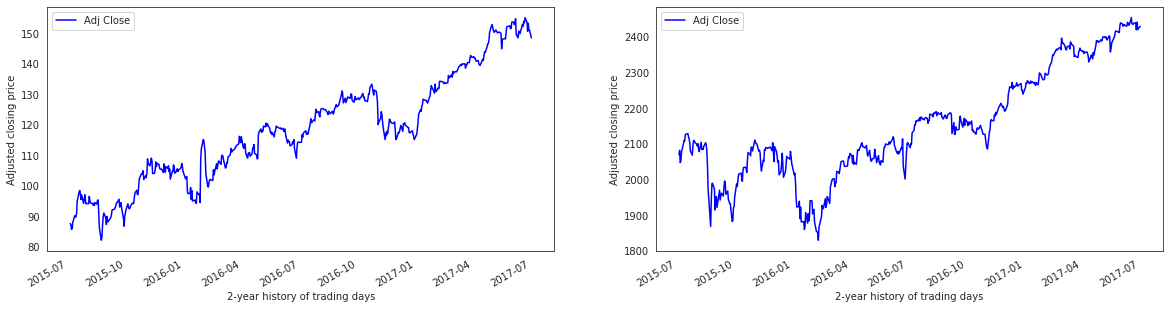

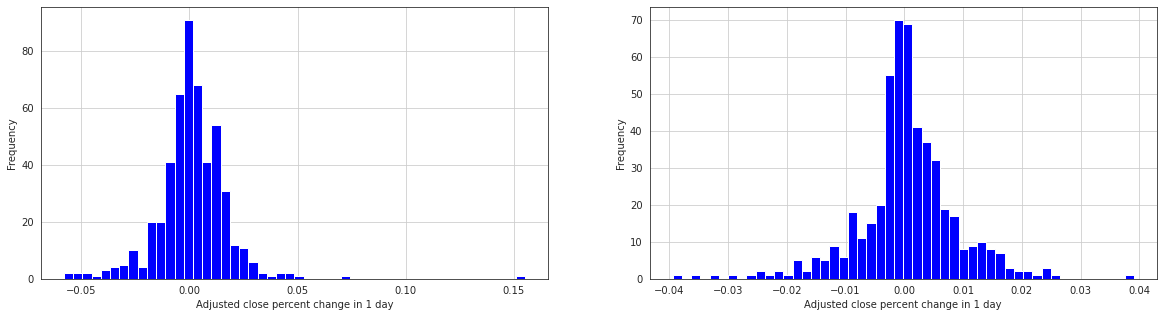

In [12]:
import seaborn as sns
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

df_list = [FB,SPY]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
for index, ax in enumerate(ax):    
    df_list[index]['Adj Close'].plot(label='Adj Close', color='b', legend=True, ax=ax)
    ax.set_xlabel('2-year history of trading days')
    ax.set_ylabel('Adjusted closing price')

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
for index, ax in enumerate(ax): 
    df_list[index]['Adj Close'].pct_change().hist(bins=50, color = 'b', ax=ax)
    ax.set_xlabel('Adjusted close percent change in 1 day')
    ax.set_ylabel('Frequency')   

In [0]:
import numpy

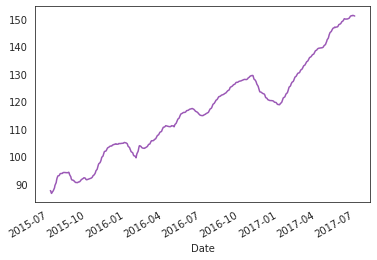

In [14]:
FB['Adj Close'].ewm(14).mean().plot()

In [0]:
def EWMA(stock_list, days_list, name_list):
    from itertools import cycle
    color = cycle('grc')

    for index,stock in enumerate(stock_list):
        fig, ax = plt.subplots(figsize=(20,6))
        stock['Adj Close'].plot(title = name_list[index], label= 'Adj Close', color='b', legend=True, ax=ax)    
        for day in days_list:    
            stock['Adj Close'].ewm(com=day).mean().plot(label= 'ewma_' + str(day) + 'day', color= next(color), legend=True, ax=ax)
            ax.set_xlabel('trading days')
            ax.set_ylabel('price')   

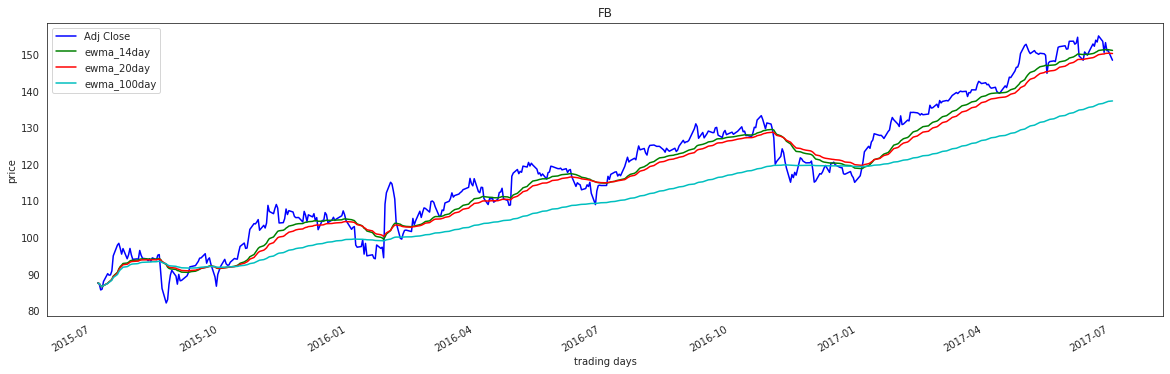

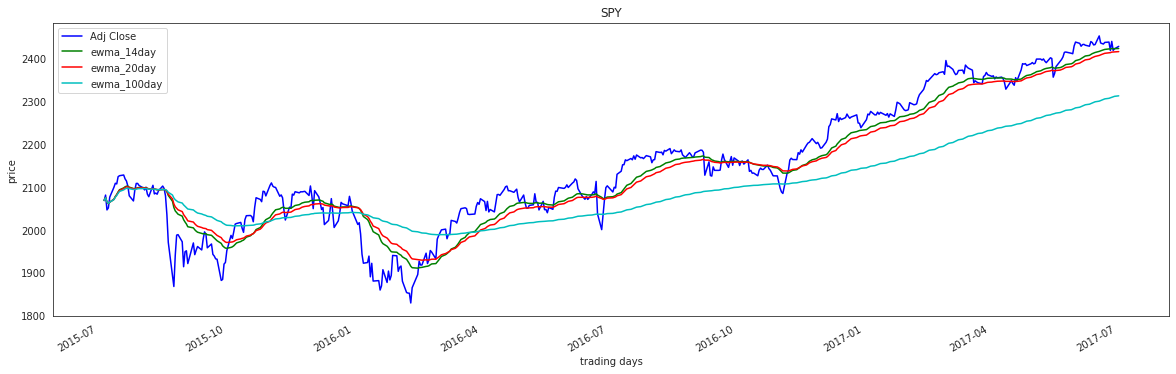

In [16]:
# call the funtion by passing stocks,their names and days ewma required          
EWMA(stock_list = [FB,SPY], name_list = ['FB','SPY'], days_list = [14,20,100])  

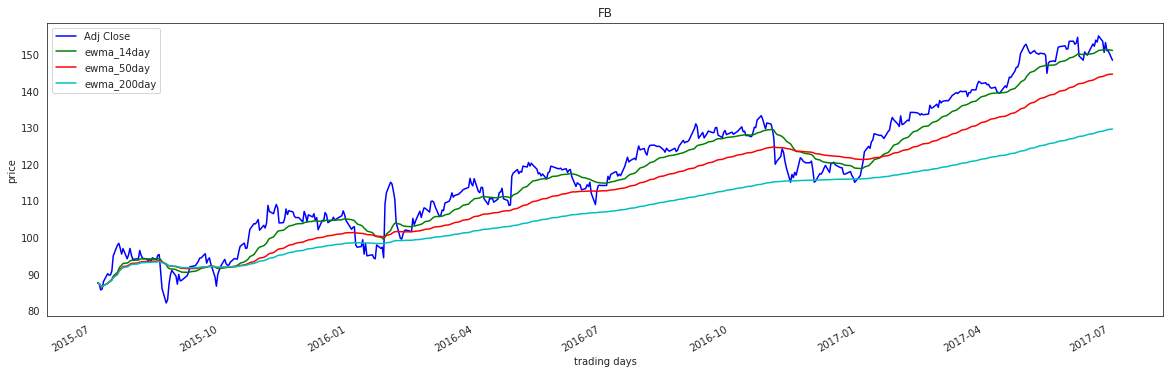

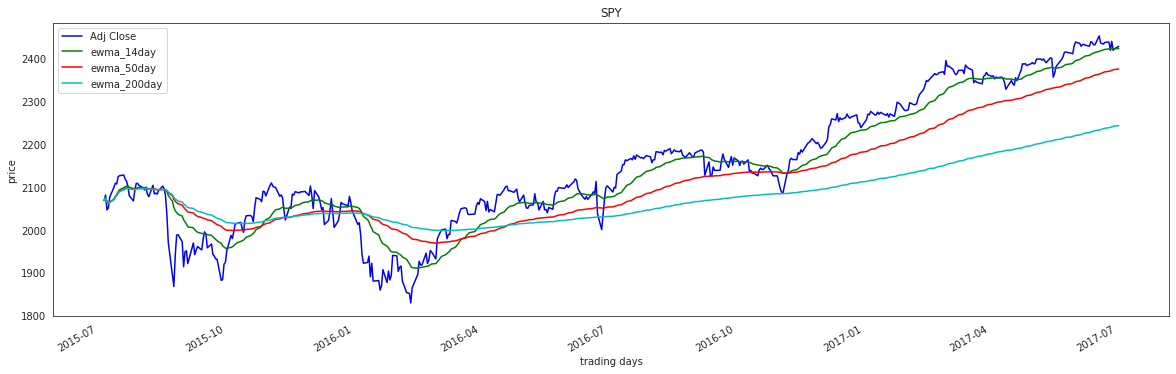

In [17]:
EWMA(stock_list = [FB,SPY], name_list = ['FB','SPY'],days_list = [14,50,200]) 

In [0]:
def RSI(stock, column="Adj Close", period=14):
    # Wilder's RSI
    close = stock[column]
    delta = close.diff() 
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0
    
    # Calculate the exponential moving averages (EWMA)
    roll_up = up.ewm(com=period - 1, adjust=False).mean()
    roll_down = down.ewm(com=period - 1, adjust=False).mean().abs()
    
    # Calculate RS based on exponential moving average (EWMA)
    rs = roll_up / roll_down   # relative strength =  average gain/average loss

    rsi = 100-(100/(1+rs))
    stock['RSI'] = rsi
    
    return stock

In [19]:
RSI(FB).head(15)

,High,Low,Open,Close,Volume,Adj Close,RSI
Date,,,,,,,
2015-07-06,88.190002,86.389999,86.489998,87.550003,24635900,87.550003,NaN
2015-07-07,87.849998,85.230003,87.800003,87.220001,33059900,87.220001,0.000000
2015-07-08,86.750000,85.449997,86.290001,85.650002,24399300,85.650002,0.000000
2015-07-09,87.599998,85.650002,86.730003,85.879997,23307400,85.879997,4.055328
2015-07-10,88.220001,86.769997,87.349998,87.949997,23245900,87.949997,31.126779
2015-07-13,90.220001,88.419998,88.660004,90.099998,29976700,90.099998,47.649012
2015-07-14,90.800003,89.650002,90.459999,89.680000,26627800,89.680000,45.359816
2015-07-15,90.989998,89.419998,90.000000,89.760002,30886600,89.760002,45.893052
2015-07-16,90.860001,89.769997,90.279999,90.849998,21804100,90.849998,52.670263


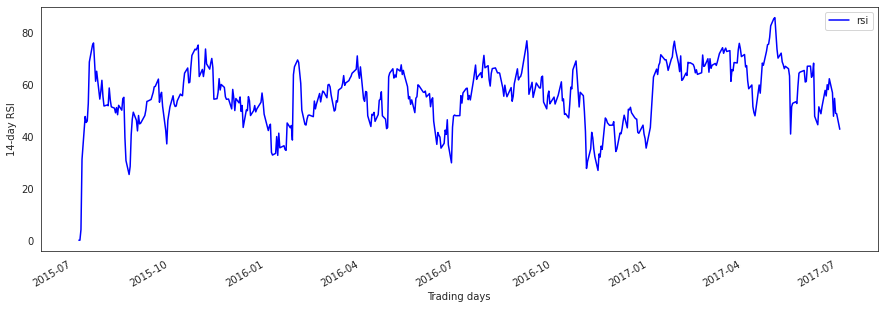

In [20]:
fig,ax=plt.subplots(figsize=(15,5))
FB.RSI.plot(ax=ax, label='rsi', legend=True, color='b');
ax.set_xlabel('Trading days'); ax.set_ylabel('14-day RSI');